# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [41]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [42]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [43]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [44]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [45]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]

total_fares

type
Rural       $4,327.93
Suburban   $19,356.33
Urban      $39,854.38
Name: fare, dtype: float64

In [46]:
#  4. Get the average fare per ride for each city type. 
average_fare = round(total_fares/total_rides,2)
average_fare

type
Rural      $34.62
Suburban   $30.97
Urban      $24.53
dtype: float64

In [47]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = total_fares/total_drivers
average_fare_driver                             

type
Rural      $55.49
Suburban   $39.50
Urban      $16.57
dtype: float64

In [48]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df =pd.DataFrame({"Total Rides":total_rides, "Total Drivers":total_drivers,"Total Fares":total_fares, "Average Fares per Ride":average_fare, "Average Fare per Driver":average_fare_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [49]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [50]:
#  8. Format the columns.
pd.options.display.float_format = '${:,.2f}'.format
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fares per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [51]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,$34.58,3908451377344,46,Urban


In [25]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#pyber_data_df.pivot_table(values='val', index=pyber_data_df.index, columns='key', aggfunc='first')
type_weekly_fares = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
type_weekly_fares.head(20)

fare
type  date                      
Rural 2019-01-01 09:45:36 $43.69
      2019-01-02 11:18:32 $52.12
      2019-01-03 19:51:01 $19.90
      2019-01-04 03:31:26 $24.88
      2019-01-06 07:38:40 $47.33
      2019-01-08 06:19:45 $19.39
      2019-01-09 15:30:35 $31.84
      2019-01-11 04:39:27 $16.42
      2019-01-14 07:09:17 $18.05
      2019-01-14 15:58:48 $54.10
      2019-01-15 21:44:26 $30.26
      2019-01-18 00:46:28 $15.12
      2019-01-18 07:36:46 $43.57
      2019-01-19 11:40:46 $49.44
      2019-01-19 12:38:07 $38.68
      2019-01-19 20:21:54 $56.78
      2019-01-22 12:42:55 $13.50
      2019-01-22 15:36:24 $10.11
      2019-01-23 06:52:00 $40.24
      2019-01-24 13:32:12 $34.74

In [26]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
type_weekly_fares = type_weekly_fares.reset_index()
type_weekly_fares.tail(10)

,type,date,fare
2365,Urban,2019-05-07 17:27:48,$6.39
2366,Urban,2019-05-07 20:05:15,$24.20
2367,Urban,2019-05-07 20:22:19,$18.74
2368,Urban,2019-05-08 01:54:18,$32.69
2369,Urban,2019-05-08 02:31:25,$41.33
2370,Urban,2019-05-08 04:20:00,$21.99
2371,Urban,2019-05-08 04:39:49,$18.45
2372,Urban,2019-05-08 07:29:01,$18.55
2373,Urban,2019-05-08 11:38:35,$19.77
2374,Urban,2019-05-08 13:10:18,$18.04


In [27]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_weekly_fares_pivot = type_weekly_fares.pivot(index="date", columns="type", values="fare")
type_weekly_fares_pivot.tail(10)

type,Rural,Suburban,Urban
date,,,
2019-05-07 20:05:15,$nan,$nan,$24.20
2019-05-07 20:22:19,$nan,$nan,$18.74
2019-05-07 20:40:29,$nan,$24.89,$nan
2019-05-08 01:54:18,$nan,$nan,$32.69
2019-05-08 02:31:25,$nan,$nan,$41.33
2019-05-08 04:20:00,$nan,$nan,$21.99
2019-05-08 04:39:49,$nan,$nan,$18.45
2019-05-08 07:29:01,$nan,$nan,$18.55
2019-05-08 11:38:35,$nan,$nan,$19.77


In [34]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

type_weekly_fares_pivot.index = pd.to_datetime(type_weekly_fares_pivot.index)type_weekly_fares_pivot.index = pd.to_datetime(type_weekly_fares_pivot.index)
type_weekly_fares_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,$nan,$nan,$37.91
2019-01-01 00:46:46,$nan,$47.74,$nan
2019-01-01 02:07:24,$nan,$24.07,$nan
2019-01-01 03:46:50,$nan,$nan,$7.57
2019-01-01 05:23:21,$nan,$nan,$10.75
...,...,...,...
2019-05-08 04:20:00,$nan,$nan,$21.99
2019-05-08 04:39:49,$nan,$nan,$18.45
2019-05-08 07:29:01,$nan,$nan,$18.55


In [35]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)type_weekly_fares_pivot.index = pd.to_datetime(type_weekly_fares_pivot.index)
type_weekly_fares_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [39]:
type_weekly_fares = type_weekly_fares_pivot.resample("D").sum()
type_weekly_fares.head(20)

type,Rural,Suburban,Urban
date,,,
2019-01-01,$43.69,$128.52,$127.78
2019-01-02,$52.12,$274.92,$305.99
2019-01-03,$19.90,$133.48,$260.48
2019-01-04,$24.88,$20.69,$258.14
2019-01-05,$0.00,$101.36,$506.89
2019-01-06,$47.33,$62.63,$202.40
2019-01-07,$0.00,$155.01,$218.02
2019-01-08,$19.39,$56.82,$379.79
2019-01-09,$31.84,$150.67,$231.34


In [40]:
type_weekly_fares.loc['2019-01-01':'2019-04-29']

type,Rural,Suburban,Urban
date,,,
2019-01-01,$43.69,$128.52,$127.78
2019-01-02,$52.12,$274.92,$305.99
2019-01-03,$19.90,$133.48,$260.48
2019-01-04,$24.88,$20.69,$258.14
2019-01-05,$0.00,$101.36,$506.89
...,...,...,...
2019-04-25,$55.84,$155.98,$419.81
2019-04-26,$0.00,$132.45,$330.98
2019-04-27,$52.34,$268.25,$367.30


In [52]:
# 7. Check that the datatype for the index is datetime using df.info()
type_weekly_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2019-01-01 to 2019-05-08
Freq: D
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     128 non-null    float64
 1   Suburban  128 non-null    float64
 2   Urban     128 non-null    float64
dtypes: float64(3)
memory usage: 9.0 KB


In [53]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_weekly_fares = type_weekly_fares_pivot.resample("W").sum()
type_weekly_fares.head(20)

type,Rural,Suburban,Urban
date,,,
2019-01-06,$187.92,$721.60,"$1,661.68"
2019-01-13,$67.65,"$1,105.13","$2,050.43"
2019-01-20,$306.00,"$1,218.20","$1,939.02"
2019-01-27,$179.69,"$1,203.28","$2,129.51"
2019-02-03,$333.08,"$1,042.79","$2,086.94"
2019-02-10,$115.80,$974.34,"$2,162.64"
2019-02-17,$95.82,"$1,045.50","$2,235.07"
2019-02-24,$419.06,"$1,412.74","$2,466.29"
2019-03-03,$175.14,$858.46,"$2,218.20"


In [62]:
weekly_fare_jan_april = type_weekly_fares.loc['2019-01-01':'2019-04-29']
weekly_fare_jan_april.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-31,$199.42,"$1,045.06","$1,942.77"
2019-04-07,$501.24,"$1,010.73","$2,356.70"
2019-04-14,$269.79,$784.82,"$2,390.72"
2019-04-21,$214.14,"$1,149.27","$2,303.80"
2019-04-28,$191.85,"$1,357.75","$2,238.29"


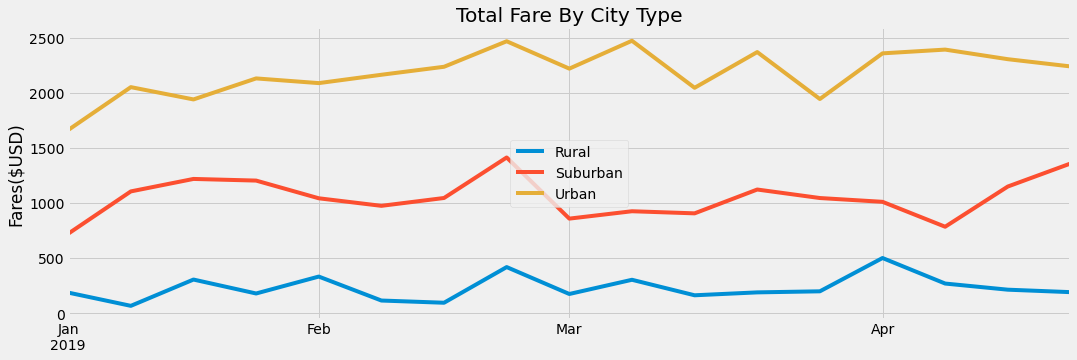

In [100]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import numpy as np

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.rcParams["figure.figsize"] = (16, 5)
weekly_fare_jan_april.plot()
plt.xlabel("")
plt.ylabel("Fares($USD)")
plt.title("Total Fare By City Type")
plt.legend(loc="center")
plt.savefig("analysis/PyBer_fare_summary.png")